# 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
from scipy import optimize as opt

In [2]:
os.chdir(r'C:/STUDY/content/Andrew Ng/machine-learning-ex2/ex2')

In [5]:
data = pd.read_csv('ex2data2.txt',names = ['Test 1','Test 2','Result'])

In [6]:
data.head()

,Test 1,Test 2,Result
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


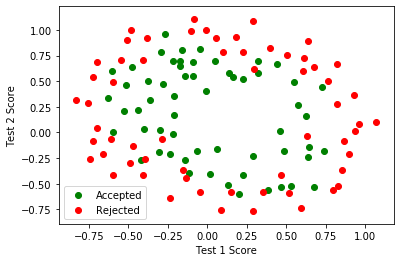

In [10]:
Accepted = data[data['Result'].isin([1])]
Rejected = data[data['Result'].isin([0])]
%matplotlib inline
plt.scatter(Accepted['Test 1'],Accepted['Test 2'],c='g',label = 'Accepted')
plt.scatter(Rejected['Test 1'],Rejected['Test 2'],c='r',label= 'Rejected')
plt.xlabel('Test 1 Score')
plt.ylabel('Test 2 Score')
plt.legend()

# interpretaion
It is clear that we cannot separate the positive and negative examples in our dataset by a straight line. So a straight forward application of logistic regression will not work for this dataset since logistic regression will only be able to find a straight decision boundary

# Feature mapping

*One way to fit the data better is to create more features from each datapoint*

we will map the features into polynomial terms of x1 & x2 upto sixth power.

In [82]:
def  mapfeature(X1 , X2):
    degree = 6
    features = np.ones(X1.shape[0])[:,np.newaxis]
   # print(X.shape , features.shape)
    #print(features)
    for i in range(1,degree + 1):
        for j in range(i+1):
            features = np.hstack((features, np.multiply(np.power(X1, i-j),np.power(X2, j))[:,np.newaxis]))   
    return features    
   

In [131]:
X = mapfeature(data.iloc[:,0] , data.iloc[:,1]) 
y = data.loc[:,['Result']]
y = np.array(y.values)
theta = np.zeros(X.shape[1])
X.shape , y.shape , theta.shape , type(X) , type(y) , type(theta)

((118, 28), (118, 1), (28,), numpy.ndarray, numpy.ndarray, numpy.ndarray)

*As a result of this mapping, our vector of two features(the scores of two QA tests) is transformed 
into a 
28-dimensional vector.*

**No doubt this will help us to build a very expressive classifier , BUT , it is also susceptible to overfitting.**

Therefore , we need to apply regularization.

#  Regularization 

In [288]:
def sigmoid(x):
    z = 1 / (1 + np.exp(-x))
    return z

def reg_CostFunction(theta,X,y,lamda):
    
    X, y, theta = np.matrix(X), np.matrix(y), np.matrix(theta)
    h = sigmoid(X*theta.T)
    regularization_Term  =   np.sum(np.power(theta[:,1:],2))  * (lamda / (2*len(X)))
    cost =  ( ( y.T * np.log(h) ) + ( (1-y).T * np.log(1-h) ) ) / -len(X)     
    J = cost + regularization_Term
    J = np.array(J)
    return J[0][0]

def reg_Gradient(theta,X,y,lamda):
    
    X, y, theta = np.matrix(X), np.matrix(y), np.matrix(theta)
    grad = np.matrix(np.zeros(theta.shape[1]))
    h = sigmoid(X*theta.T)
    grad = np.multiply( (1/len(X)) , (X.T * (h - y) ) )
    grad[1:] = grad[1:] + ( (lamda/len(X))*theta.T[1:] )
    grad = np.array(grad.T)
    return grad[0]               
    

In [290]:
print(reg_CostFunction(theta,X,y,lamda=1))
grad = reg_Gradient(theta,X,y,lamda=1)
grad

0.6931471805599453


array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

In [313]:
lamda=1
result = opt.fmin_tnc(func=reg_CostFunction,fprime=reg_Gradient,x0=theta,args=(X,y,lamda))
result[0]

array([ 1.27271026,  0.62529965,  1.18111687, -2.019874  , -0.91743189,
       -1.4316693 ,  0.12393227, -0.36553118, -0.35725406, -0.17516292,
       -1.45817009, -0.05098418, -0.61558555, -0.27469165, -1.19271297,
       -0.2421784 , -0.20603301, -0.04466178, -0.27778948, -0.29539513,
       -0.45645982, -1.04319154,  0.02779373, -0.29244867,  0.01555759,
       -0.32742404, -0.1438915 , -0.92467487])

In [307]:
optimal_parameters = np.matrix(result[0])
x = np.matrix(X)
predictions = [sigmoid(x*optimal_parameters.T) >= 0.5]
accuracy = np.mean(predictions==y) * 100
print('Accuracy = {} %'.format(accuracy))

Accuracy = 83.05084745762711 %


# plotting Decision Boundary

In [317]:
u = np.linspace(-1,1.5,50)
v = np.linspace(-1,1.5,50)
z = np.zeros((len(u),len(v)))

def MapFeature2(X1,X2):
    degree = 6
    features = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            features = np.hstack( (features, np.multiply( np.power(X1,i-j) , np.power(X2,j)) ))
    return features

for i in range(len(u)):
    for j in range(len(v)):
       z[i,j] = np.dot( MapFeature2(u[i],v[j]) , result[0]) 
         

<IPython.core.display.Javascript object>


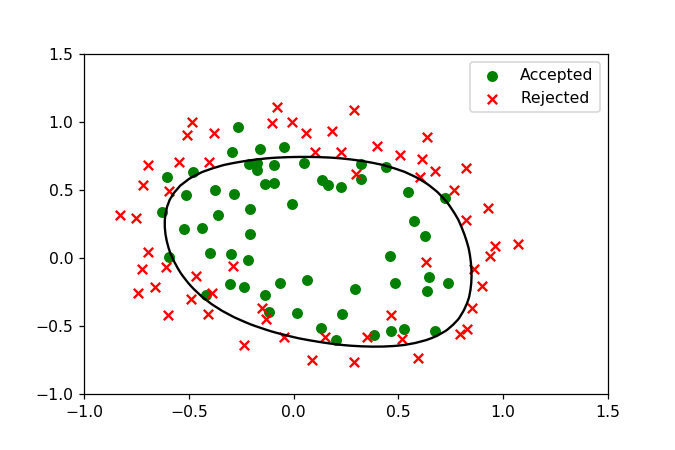

In [333]:
%matplotlib notebook
plt.scatter(Accepted['Test 1'],Accepted['Test 2'],c='g',marker='o',label='Accepted')
plt.scatter(Rejected['Test 1'],Rejected['Test 2'],c='r',marker='x',label='Rejected')
plt.contour(u,v,z,0,colors='black')
plt.legend()
